<a href="https://colab.research.google.com/github/omarv10/WC2022-prediction/blob/main/wc2022_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Needed Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



In [ ]:
df = pd.read_csv("Updated_International_matches - Sheet1.csv", sep=",")
print(df)


In [ ]:
df.info()

In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,11010.000000,11010.000000,11010.000000,11010.000000,11010.000000,11010.000000,6220.000000,5973.000000,5743.000000,6074.000000,6020.000000,5510.000000,5899.000000,5886.000000
mean,82.585831,86.044959,702.641871,685.373751,1.548865,1.058492,74.696945,73.999833,74.661153,75.469295,75.844817,74.176642,74.942668,75.104060
std,55.026463,55.096184,527.724498,519.747550,1.553544,1.249955,7.640265,7.690917,5.690164,6.101904,5.783749,5.546385,5.992396,5.831601
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,56.500000,53.300000,57.500000,56.500000,53.300000,57.500000
25%,35.000000,39.000000,240.000000,228.250000,0.000000,0.000000,70.000000,69.000000,70.800000,71.300000,72.500000,70.500000,71.000000,71.800000
50%,77.000000,80.000000,615.000000,594.000000,1.000000,1.000000,75.000000,74.000000,74.800000,75.000000,76.200000,74.200000,74.700000,75.500000
75%,124.000000,127.000000,1171.750000,1148.000000,2.000000,2.000000,80.000000,80.000000,78.200000,79.700000,79.500000,77.800000,78.700000,78.800000
max,211.000000,211.000000,2164.000000,2164.000000,17.000000,14.000000,92.000000,92.000000,87.800000,90.700000,88.800000,87.800000,90.700000,88.800000


In [ ]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,match_result
0,2010-01-02,IR Iran,Korea DPR,Asia,Asia,64,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2010-01-02,Qatar,Mali,Asia,Africa,86,47,0,0,0,...,Draw,NaN,53.0,NaN,NaN,NaN,73.0,74.7,77.8,1
2,2010-01-02,Syria,Zimbabwe,Asia,Africa,91,109,0,0,6,...,Win,NaN,NaN,NaN,NaN,NaN,62.2,71.3,60.0,2
3,2010-01-02,Yemen,Tajikistan,Asia,Asia,130,165,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2010-01-03,Angola,Gambia,Africa,Africa,95,116,0,0,1,...,Draw,70.0,67.0,NaN,73.7,63.2,NaN,66.3,64.5,1


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

Reshaping Data to place in my x and y values

In [ ]:
reshaped_data = df[['home_team', 'away_team','home_team_fifa_rank', 'away_team_fifa_rank','home_team_score', 'away_team_score','home_team_result'
                    ]]
print(reshaped_data)



In [ ]:
reshaped_data.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,home_team_result
0,IR Iran,Korea DPR,64,86,1,0,Win
1,Qatar,Mali,86,47,0,0,Draw
2,Syria,Zimbabwe,91,109,6,0,Win
3,Yemen,Tajikistan,130,165,0,1,Lose
4,Angola,Gambia,95,116,1,1,Draw


Turning Nominal attributes to numeric attributes

In [ ]:
countries = ['IR Iran'=89, 'Qatar'=154, 'Syria'=183, 'Yemen'=208, 'Angola'=5, 'Egypt'=60,
       'Tanzania'=187, 'Ghana'=76, 'Bahrain'=15, 'Benin'=21, 'China PR'=41, 'Gabon'=72,
       'Indonesia'=92, 'Kuwait'=104, 'Lebanon'=108, 'Singapore'=167, 'Thailand'=188,
       'United Arab Emirates'=201, 'Rwanda'=158, 'Kenya'=100, 'Tunisia'=193, 'Zambia'=209,
       "Côte d'Ivoire"=54, 'Malawi'=117, 'Mozambique'=130, 'Cameroon'=35, 'Mali'=120,
       'Nigeria'=139, 'Vietnam'=206, 'Finland'=70, 'Burkina Faso'=31, 'Chile'=40, 'Oman'=143,
       'Latvia'=107, 'Poland'=151, 'USA'=198, 'Argentina'=8, 'South Africa'=172, 'Algeria'=2,
       'Jamaica'=96, 'Japan'=97, 'Korea Republic'=102, 'Hong Kong'=87, 'Sri Lanka'=175,
       'Tajikistan'=186, 'Korea DPR'=101, 'Bangladesh'=16, 'Kyrgyz Republic'=105,
       'Turkmenistan'=195, 'Mexico'=124, 'Jordan'=98, 'Malaysia'=118,
       'Republic of Ireland'=155, 'Albania'=1, 'Armenia'=9, 'Australia'=11,
       'Austria'=12, 'Belgium'=19, 'Bosnia and Herzegovina'=25, 'Cyprus'=52,
       'El Salvador'=61, 'England'=62, 'France'=71, 'Georgia'=74, 'Germany'=75, 'Greece'=78,
       'Hungary'=88, 'Italy'=95, 'Kazakhstan'=99, 'Libya'=111, 'Luxembourg'=114,
       'North Macedonia'=140, 'Malta'=121, 'Netherlands'=134, 'Portugal'=152, 'Romania'=156,
       'Scotland'=162, 'Slovakia'=168, 'Slovenia'=169, 'Switzerland'=182, 'Turkey'=194,
       'Uzbekistan'=203, 'Venezuela'=205, 'Wales'=207, 'Zimbabwe'=210, 'Niger'=138, 'Iceland'=90,
       'Namibia'=132, 'Paraguay'=148, 'Honduras'=86, 'Aruba'=10, 'Congo DR'=46, 'Estonia'=65,
       'Croatia'=49, 'Montenegro'=127, 'Ukraine'=200, 'Azerbaijan'=13,
       'Northern Ireland'=141, 'Uruguay'=202, 'Belarus'=18, 'Denmark'=55, 'Moldova'=125,
       'New Zealand'=136, 'Norway'=142, 'Spain'=174, 'Sweden'=181, 'Serbia'=164, 'Sudan'=179,
       'Brazil'=27, 'Lithuania'=113, 'Chad'=39, 'Botswana'=26, 'Togo'=190, 'Bolivia'=24,
       'Czech Republic'=53, 'Mauritania'=122, 'Morocco'=129, 'Panama'=146, 'Russia'=157,
       'Saudi Arabia'=161, 'Senegal'=163, 'Trinidad and Tobago'=192, 'Uganda'=199,
       'Ethiopia'=67, 'St. Kitts and Nevis'=176, 'Madagascar'=116, 'Israel'=94,
       'Andorra'=4, 'Faroe Islands'=68, 'Liechtenstein'=112, 'San Marino'=160,
       'Canada'=36, 'Cabo Verde'=33, 'Guatemala'=81, 'Guinea-Bissau'=83, 'Mauritius'=123,
       'Liberia'=110, 'Eswatini'=66, 'Bulgaria'=30, 'India'=91, 'Belize'=20, 'St. Lucia'=177,
       'Anguilla'=6, 'Antigua and Barbuda'=7, 'Iraq'=93, 'Barbados'=17, 'Guyana'=84,
       'New Caledonia'=135, 'Palestine'=145, 'Puerto Rico'=153, 'Cayman Islands'=37,
       'Colombia'=43, 'Montserrat'=128, 'Peru'=149, 'St. Vincent and the Grenadines'=178,
       'Burundi'=32, 'Comoros'=44, 'Central African Republic'=38, 'Congo'=45,
       'Guinea'=82, 'Sierra Leone'=166, 'Costa Rica'=48, 'Ecuador'=59,
       'Equatorial Guinea'=63, 'Philippines'=150, 'Dominican Republic'=58,
       'British Virgin Islands'=28, 'Suriname'=180, 'Timor-Leste'=189, 'Grenada'=79,
       'Laos'=106, 'Cambodia'=34, 'Haiti'=85, 'Cuba'=50, 'Dominica'=57, 'Myanmar'=131,
       'Nicaragua'=137, 'Vanuatu'=204, 'Macau'=115, 'Mongolia'=126, 'Nepal'=133, 'Maldives'=119,
       'Bhutan'=23, 'Pakistan'=144, 'Afghanistan'=0, 'Tahiti'=185,
       'Turks and Caicos Islands'=196, 'US Virgin Islands'=197, 'Solomon Islands'=170,
       'Bahamas'=14, 'Fiji'=69, 'Gambia'=73, 'Eritrea'=64, 'Lesotho'=109,
       'Papua New Guinea'=147, 'American Samoa'=3, 'Cook Islands'=47, 'Guam'=80,
       'Curaçao'=51, 'Bermuda'=22, 'Djibouti'=56, 'São Tomé and Príncipe'=184,
       'Seychelles'=165, 'Somalia'=171, 'Samoa'=159, 'Tonga'=191, 'Brunei Darussalam'=29,
       'South Sudan'=173, 'Kosovo'=103, 'Chinese Taipei'=42, 'Gibraltar'=77]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reshaped_data['new_home_team'] = le.fit_transform(reshaped_data.home_team)
reshaped_data['new_away_team'] = le.fit_transform(reshaped_data.away_team)
reshaped_data['new_home_team_result'] = le.fit_transform(reshaped_data.home_team_result)
reshaped_data.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,home_team_result,new_home_team,new_away_team,new_home_team_result
0,IR Iran,Korea DPR,64,86,1,0,Win,89,101,2
1,Qatar,Mali,86,47,0,0,Draw,154,120,0
2,Syria,Zimbabwe,91,109,6,0,Win,183,210,2
3,Yemen,Tajikistan,130,165,0,1,Lose,208,186,1
4,Angola,Gambia,95,116,1,1,Draw,5,73,0


In [ ]:
reshaped_data = reshaped_data.reindex(columns=['new_home_team', 'new_away_team','home_team_fifa_rank', 'away_team_fifa_rank','home_team_score', 
                    'away_team_score','new_home_team_result'])
reshaped_data.head()

,new_home_team,new_away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,new_home_team_result
0,89,101,64,86,1,0,2
1,154,120,86,47,0,0,0
2,183,210,91,109,6,0,2
3,208,186,130,165,0,1,1
4,5,73,95,116,1,1,0


Getting x and y values

In [ ]:
x = reshaped_data.drop(['new_home_team_result'], axis=1)

y = reshaped_data['new_home_team_result']
  

In [ ]:
x.isnull().sum()

new_home_team          0
new_away_team          0
home_team_fifa_rank    0
away_team_fifa_rank    0
home_team_score        0
away_team_score        0
dtype: int64

In [ ]:
x.dropna(inplace=True)
x.head()

,new_home_team,new_away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score
0,89,101,64,86,1,0
1,154,120,86,47,0,0
2,183,210,91,109,6,0
3,208,186,130,165,0,1
4,5,73,95,116,1,1


In [ ]:
print(x)
x.columns

Desicion search tree algorithm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4) #40% data for test

In [ ]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 15)
np.mean(cross_val_score(dt, x_train, y_train, cv=10))

0.9869797826983909

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15)

[Text(0.45, 0.9285714285714286, 'home_team_score <= 1.5\ngini = 0.631\nsamples = 6606\nvalue = [1490, 1921, 3195]'),
 Text(0.3, 0.7857142857142857, 'away_team_score <= 1.5\ngini = 0.638\nsamples = 3834\nvalue = [1235, 1758, 841]'),
 Text(0.25, 0.6428571428571429, 'away_team_score <= 0.5\ngini = 0.636\nsamples = 2658\nvalue = [1235, 582, 841]'),
 Text(0.15, 0.5, 'home_team_score <= 0.5\ngini = 0.498\nsamples = 1413\nvalue = [568, 21, 824]'),
 Text(0.1, 0.35714285714285715, 'home_team_fifa_rank <= 1.5\ngini = 0.114\nsamples = 604\nvalue = [568, 21, 15]'),
 Text(0.05, 0.21428571428571427, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.15, 0.21428571428571427, 'gini = 0.108\nsamples = 602\nvalue = [568, 20, 14]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 809\nvalue = [0, 0, 809]'),
 Text(0.35, 0.5, 'home_team_score <= 0.5\ngini = 0.51\nsamples = 1245\nvalue = [667, 561, 17]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.004\nsamples = 545\nvalue = [0, 544, 1]'),
 Text(0

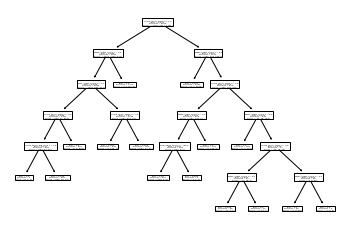

In [ ]:
tree.plot_tree(dt, feature_names=x.columns)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("search_tree") 

'search_tree.pdf'

In [ ]:
y_dtpred = dt.predict(x_test)

Testing single value predictions between top ranked teams

In [ ]:
y_prediction = dt.predict([[27.,19.,1.,2.,0.,0.],[19.,27.,2.,1.,0.,0.]]) #brazil vs belgium & belgium vs brazil 0-0 (brazil wins)
print(y_prediction)
y_prediction = dt.predict([[8.,27.,4.,1.,0.,0.],[27.,8.,1.,4.,0.,0.]])#argentina vs brazil & brazil vs argentina 0-0 (brazil wins)
print(y_prediction)
y_prediction = dt.predict([[71.,27.,3.,1.,0.,0.],[27.,71.,1.,3.,0.,0.]])#france vs brazil & brazil vs france 0-0 (brazil wins)
print(y_prediction)
y_prediction = dt.predict([[71.,27.,3.,1.,0.,0.],[27.,71.,1.,3.,0.,0.]])#france vs brazil & brazil vs france 0-0 (brazil wins)
print(y_prediction)
y_prediction = dt.predict([[75.,27.,12.,1.,0.,0.],[27.,75.,1.,12.,0.,0.]])#germany vs brazil & brazil vs germany 0-0 (brazil wins)
print(y_prediction)
y_prediction = dt.predict([[71.,19.,3.,2.,0.,0.],[19.,71.,2.,3.,0.,0.]]) #france vs belgium & belgium vs france 0-0 (tie)
print(y_prediction)
y_prediction = dt.predict([[8.,19.,4.,2.,0.,0.],[19.,8.,2.,4.,0.,0.]]) #argentina vs belgium & belgium vs argentina 0-0 (tie)
print(y_prediction)
y_prediction = dt.predict([[75.,19.,12.,2.,0.,0.],[19.,75.,2.,12.,0.,0.]]) #germany vs belgium & belgium vs germany 0-0 (tie)
print(y_prediction)
y_prediction = dt.predict([[71.,8.,3.,4.,0.,0.],[8.,71.,4.,3.,0.,0.]])#france vs argentina & argentina vs france 0-0 (tie)
print(y_prediction)
y_prediction = dt.predict([[71.,75.,3.,12.,0.,0.],[75.,71.,12.,3.,0.,0.]])#france vs germany & germany vs france 0-0 (tie)
print(y_prediction)
y_prediction = dt.predict([[8.,75.,4.,12.,0.,0.],[75.,8.,12.,4.,0.,0.]])#argentina vs germany & germany vs argentina 0-0 (tie)
print(y_prediction)

[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

In [ ]:
print(y_dtpred)

[2 2 0 ... 0 2 2]


In [ ]:
y_test

6758     2
10371    2
7727     0
1993     2
3792     1
        ..
1305     2
3124     0
3574     0
439      2
10869    2
Name: new_home_team_result, Length: 4404, dtype: int64

In [ ]:
dttestacc = accuracy_score(y_test,y_dtpred)
print(dttestacc)

0.9872842870118075


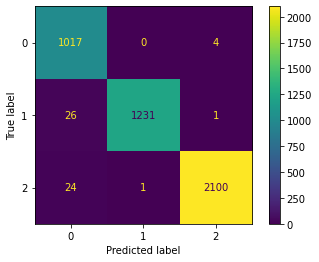

In [ ]:
dtcm = confusion_matrix(y_test,y_dtpred)
disp = ConfusionMatrixDisplay(confusion_matrix=dtcm)
disp.plot()
plt.show()

KNN algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=28)
np.mean(cross_val_score(neigh,x_train,y_train, cv=10))

0.5641800761014074

In [ ]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=28)

In [ ]:
y_nnpread = neigh.predict(x_test)
np.savetxt('y_knn_pred.txt', y_nnpread, fmt = "%s")
#print(y_nnpread)

In [ ]:
nntestac = accuracy_score(y_test,y_nnpread)
print(nntestac)

0.5533605812897366


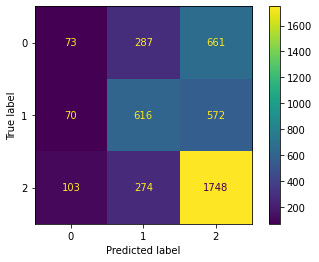

In [ ]:
nncm = confusion_matrix(y_test,y_nnpread)
disp = ConfusionMatrixDisplay(confusion_matrix=nncm)
disp.plot()
plt.show()